In [18]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [2]:
pmf = thinkstats2.Pmf([1,2,2,3,5])

In [3]:
thinkstats2.Hist([1,2,2,3,5])

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [4]:
pmf.Prob(2)

0.4

In [5]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [6]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [7]:
first_pmf = thinkstats2.Pmf(firsts.prglngth)
other_pmf = thinkstats2.Pmf(others.prglngth)

In [8]:
first_pmf

Pmf({39: 0.47903920235667347, 40: 0.12145932472241106, 41: 0.08157715839564922, 38: 0.0616360752322683, 37: 0.04713346929526399, 42: 0.04645365964196692, 36: 0.03897575345569907, 35: 0.03602991162474507, 43: 0.01971447994561523, 30: 0.016542034896895538, 32: 0.012463176977113076, 34: 0.006571493315205076, 33: 0.0063448900974393836, 28: 0.005438477226376614, 44: 0.005211874008610923, 26: 0.0036256514842510764, 31: 0.003399048266485384, 29: 0.0020394289598912306, 24: 0.0015862225243598459, 45: 0.0013596193065941536, 22: 0.0006798096532970768, 48: 0.0006798096532970768, 20: 0.00022660321776569228, 47: 0.00022660321776569228, 17: 0.00022660321776569228, 21: 0.00022660321776569228, 25: 0.00022660321776569228, 46: 0.00022660321776569228, 23: 0.00022660321776569228, 27: 0.00022660321776569228, 0: 0.00022660321776569228})

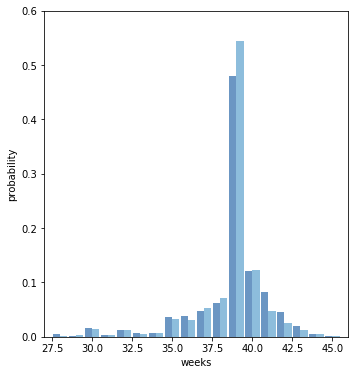

In [9]:
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks',ylabel='probability',axis=[27, 46, 0, 0.6])

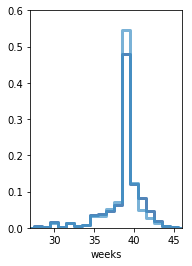

<Figure size 576x432 with 0 Axes>

In [11]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks',axis=[27, 46, 0, 0.6])

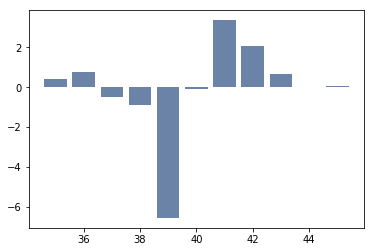

In [15]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
    
thinkplot.Bar(weeks, diffs)

In [14]:
diffs

[0.39285388686732675,
 0.7507960425076052,
 -0.503126143335269,
 -0.9113660776179422,
 -6.562816828746593,
 -0.10327555310208347,
 3.363629250335777,
 2.0476890898566706,
 0.6831692194823253,
 0.035442944683689984,
 0.051484633932910605]

In [18]:
d = { 7: 8, 12: 8, 17: 14, 22: 4,27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')
print('mean:', pmf.Mean())


mean: 23.692307692307693


dict_values([8, 8, 14, 4, 6, 12, 8, 3, 2])

In [23]:
sum(d.values())

65

In [34]:
pmf = thinkstats2.Pmf(d, label='actual')
pmf


Pmf({7: 0.12307692307692308, 12: 0.12307692307692308, 17: 0.2153846153846154, 22: 0.06153846153846154, 27: 0.09230769230769231, 32: 0.18461538461538463, 37: 0.12307692307692308, 42: 0.046153846153846156, 47: 0.03076923076923077}, 'actual')

In [36]:
print('mean:', pmf.Mean())

mean: 23.692307692307693


In [50]:
mydict = {1:1,2:2,3:5}
pm1 = thinkstats2.Pmf(mydict)
pm1

Pmf({1: 0.125, 2: 0.25, 3: 0.625})

In [54]:
pm1.Mult(1,10)


In [55]:
pm1

Pmf({1: 1.25, 2: 0.25, 3: 0.625})

In [46]:
for x, p in pmf.Items():
pm1

Pmf({1: 0.875, 2: 0.25, 3: 0.625})

In [56]:
for x, p in pmf.Items():
    print(x * p)

0.8615384615384616
1.476923076923077
3.661538461538462
1.353846153846154
2.4923076923076923
5.907692307692308
4.553846153846154
1.9384615384615387
1.4461538461538463


In [61]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf


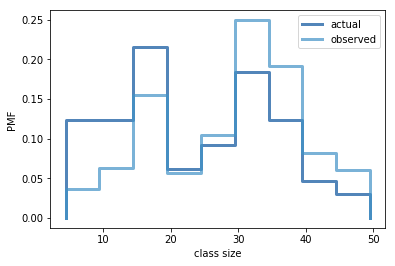

<Figure size 576x432 with 0 Axes>

In [62]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

In [63]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
    new_pmf.Normalize()
    return new_pmf

In [65]:
unbiased_pmf = UnbiasPmf(biased_pmf, label='observed')

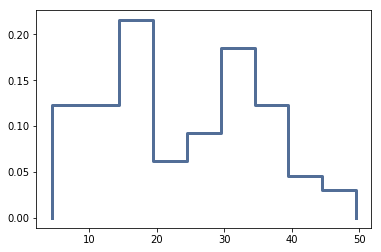

In [66]:
thinkplot.Pmf(unbiased_pmf)

In [69]:
import numpy as np
import pandas as pd
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,0.104145,-1.426488
1,-0.224636,1.565510
2,-0.416053,-0.537026
3,0.160599,0.303170


In [68]:
columns = ['A','B']

In [70]:
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,0.104145,-1.426488
1,-0.224636,1.565510
2,-0.416053,-0.537026
3,0.160599,0.303170


In [73]:
index = ['a','b','c','c']
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.104145,-1.426488
b,-0.224636,1.565510
c,-0.416053,-0.537026
c,0.160599,0.303170


In [74]:
df['A']

a    0.104145
b   -0.224636
c   -0.416053
c    0.160599
Name: A, dtype: float64

In [75]:
df.A

a    0.104145
b   -0.224636
c   -0.416053
c    0.160599
Name: A, dtype: float64

In [76]:
df.loc['a']

A    0.104145
B   -1.426488
Name: a, dtype: float64

In [77]:
df.iloc[0]

A    0.104145
B   -1.426488
Name: a, dtype: float64

In [79]:
df[0:2]

,A,B
a,0.104145,-1.426488
b,-0.224636,1.565510


In [81]:
df['a':'c']

,A,B
a,0.104145,-1.426488
b,-0.224636,1.565510
c,-0.416053,-0.537026
c,0.160599,0.303170


In [82]:
indicies = ['a','c']
df.loc[indicies]

,A,B
a,0.104145,-1.426488
c,-0.416053,-0.537026
c,0.160599,0.303170


In [1]:
import relay

In [3]:
results = relay.ReadResults()
results

[('1', '1/362', 'M2039', '30:43', '30:42', '4:57'),
 ('2', '2/362', 'M2039', '31:36', '31:36', '5:06'),
 ('3', '3/362', 'M2039', '31:42', '31:42', '5:07'),
 ('4', '4/362', 'M2039', '32:28', '32:27', '5:14'),
 ('5', '5/362', 'M2039', '32:52', '32:52', '5:18'),
 ('6', '6/362', 'M2039', '33:06', '33:06', '5:20'),
 ('7', '1/256', 'M4049', '33:33', '33:33', '5:24'),
 ('8', '2/256', 'M4049', '33:42', '33:42', '5:26'),
 ('9', '3/256', 'M4049', '33:54', '33:54', '5:28'),
 ('10', '7/362', 'M2039', '33:56', '33:56', '5:28'),
 ('11', '8/362', 'M2039', '34:13', '34:13', '5:31'),
 ('12', '4/256', 'M4049', '34:25', '34:25*', '5:33'),
 ('13', '5/256', 'M4049', '35:22', '35:22', '5:42'),
 ('14', '9/362', 'M2039', '35:50', '35:49', '5:46'),
 ('15', '1/448', 'F2039', '36:31', '36:31', '5:53'),
 ('16', '10/362', 'M2039', '36:42', '36:41', '5:55'),
 ('17', '2/448', 'F2039', '36:53', '36:52', '5:56'),
 ('18', '3/448', 'F2039', '37:16', '37:16', '6:00'),
 ('19', '11/362', 'M2039', '37:35', '37:26', '6:02'),

In [11]:
speeds = relay.GetSpeeds(results)
print(min(speeds))
print(max(speeds))

3.0612244897959187
12.121212121212121


In [12]:
speeds

[12.121212121212121,
 11.76470588235294,
 11.726384364820847,
 11.464968152866243,
 11.320754716981133,
 11.25,
 11.11111111111111,
 11.042944785276074,
 10.97560975609756,
 10.97560975609756,
 10.876132930513595,
 10.81081081081081,
 10.526315789473683,
 10.404624277456648,
 10.19830028328612,
 10.140845070422536,
 10.112359550561797,
 10.000000000000002,
 9.94475138121547,
 9.890109890109892,
 9.863013698630137,
 9.782608695652174,
 9.75609756097561,
 9.75609756097561,
 9.75609756097561,
 9.703504043126685,
 9.677419354838712,
 9.677419354838712,
 9.651474530831099,
 9.651474530831099,
 9.651474530831099,
 9.62566844919786,
 9.549071618037136,
 9.523809523809524,
 9.498680738786279,
 9.498680738786279,
 9.498680738786279,
 9.448818897637794,
 9.424083769633508,
 9.424083769633508,
 9.399477806788513,
 9.375,
 9.375,
 9.375,
 9.375,
 9.35064935064935,
 9.35064935064935,
 9.278350515463918,
 9.278350515463918,
 9.254498714652955,
 9.230769230769232,
 9.230769230769232,
 9.2307692307692

In [21]:
speeds = relay.BinData(speeds, 3, 12, 100)
speeds

array([12.09, 11.73, 11.73, ...,  3.27,  3.27,  3.09])

In [22]:
len(np.unique(speeds))

82

In [23]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')

In [27]:
new = pmf.Copy(label = 'observed speeds')
for val in new.Values():
    diff = abs(val - 7.5)
    new.Mult(val, diff)
new.Normalize()


1.089812030075188

In [28]:
sum(new.Values())

613.3800000000001

In [31]:
biased = new

In [32]:
    thinkplot.Pmf(biased)
    thinkplot.Save(root='observed_speeds',
                   title='PMF of running speed',
                   xlabel='speed (mph)',
                   ylabel='PMF')

    cdf = thinkstats2.Cdf(pmf)
    cdf_biased = thinkstats2.Cdf(biased)

    thinkplot.PrePlot(2)
    thinkplot.Cdfs([cdf, cdf_biased])
    thinkplot.Save(root='observed_speeds_cdf',
                   title='CDF of running speed',
                   xlabel='speed (mph)',
                   ylabel='CDF')

Writing observed_speeds.pdf
Writing observed_speeds.png
Writing observed_speeds_cdf.pdf
Writing observed_speeds_cdf.png


<Figure size 576x432 with 0 Axes>

In [40]:
x=0
for k, v in biased.Items():
    x+=v
print(x)

0.9999999999999997


In [39]:
biased.